In [13]:
import yfinance as yf
from datetime import datetime


In [14]:
end = datetime.now()
start = datetime(end.year-21, end.month, end.day)
stock = "AAPL"
apple_data = yf.download(stock, start, end)
apple_data.head()
apple_data.shape
apple_data.describe()
apple_data.info()
apple_data.isna().sum()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5286 entries, 2003-11-10 00:00:00+00:00 to 2024-11-08 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  5286 non-null   float64
 1   (Close, AAPL)      5286 non-null   float64
 2   (High, AAPL)       5286 non-null   float64
 3   (Low, AAPL)        5286 non-null   float64
 4   (Open, AAPL)       5286 non-null   float64
 5   (Volume, AAPL)     5286 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 289.1 KB


,,0
Price,Ticker,
Adj Close,AAPL,0
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


Text(0.5, 1.0, 'Closing price of Apple data')

<Figure size 1500x500 with 0 Axes>

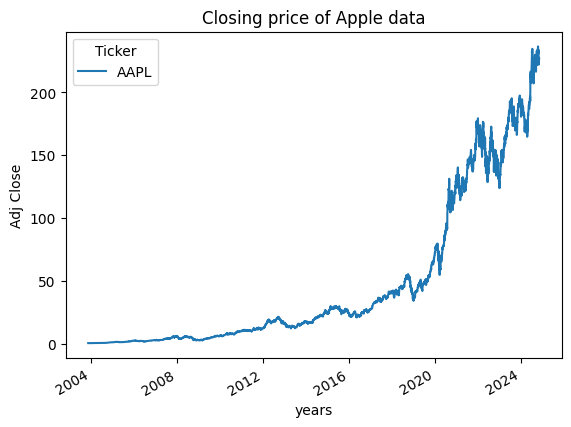

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,5))
apple_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Apple data")

In [17]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Apple data")

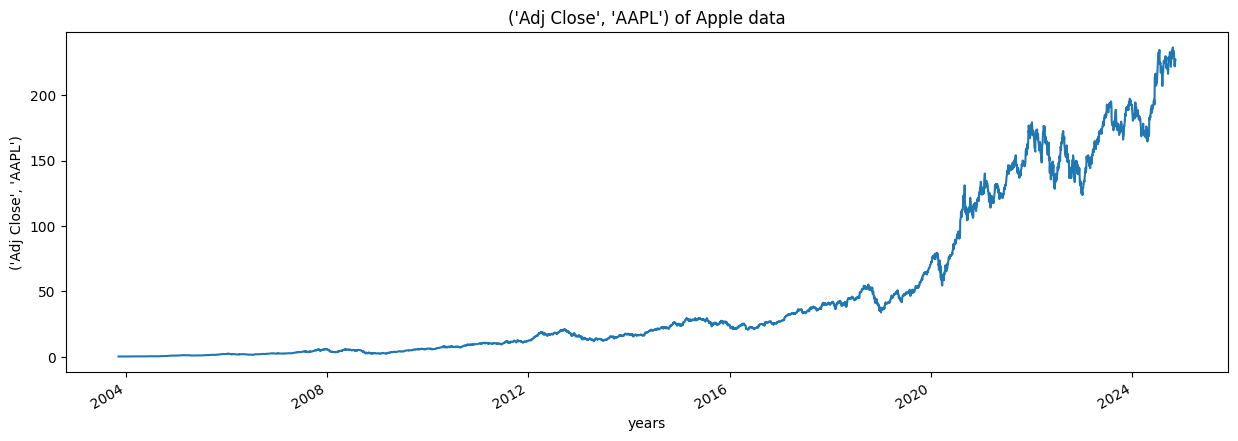

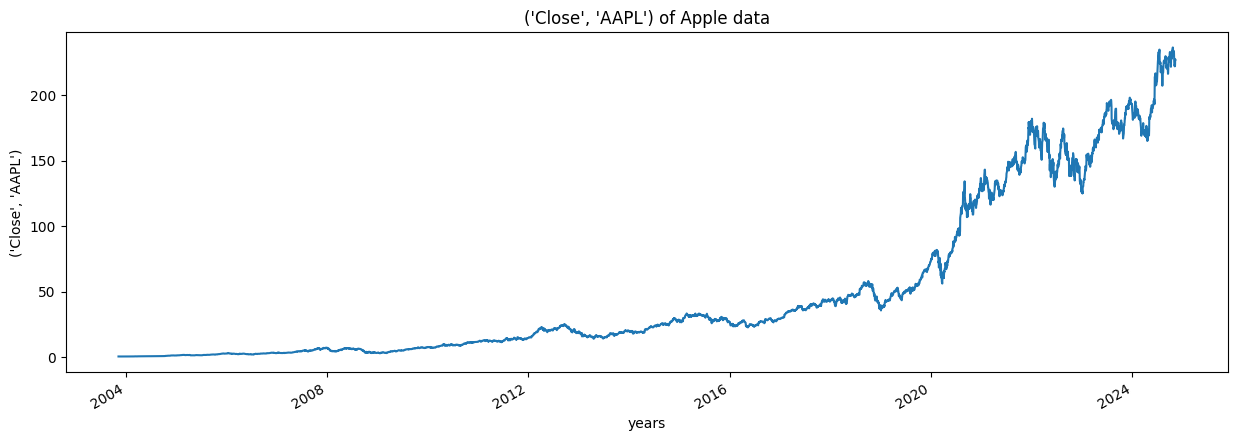

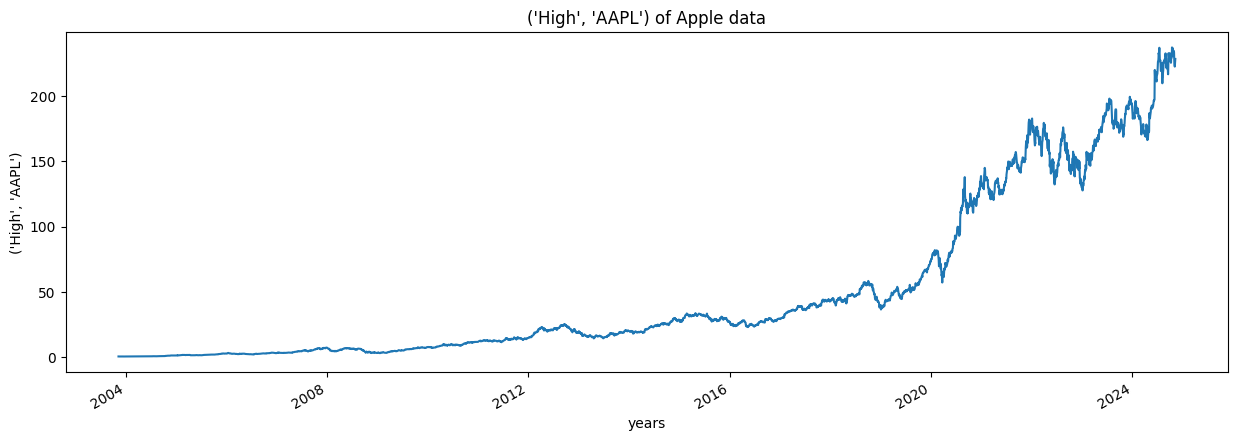

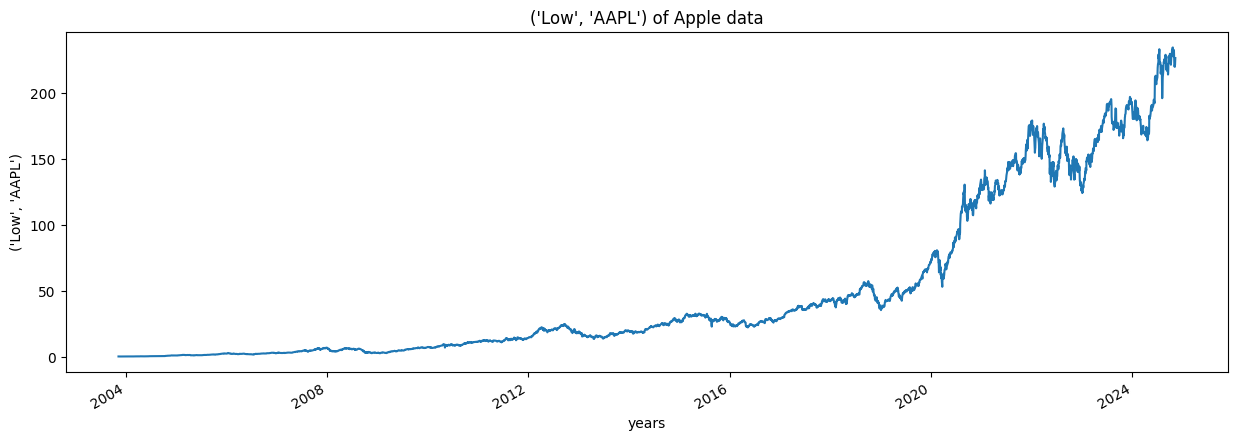

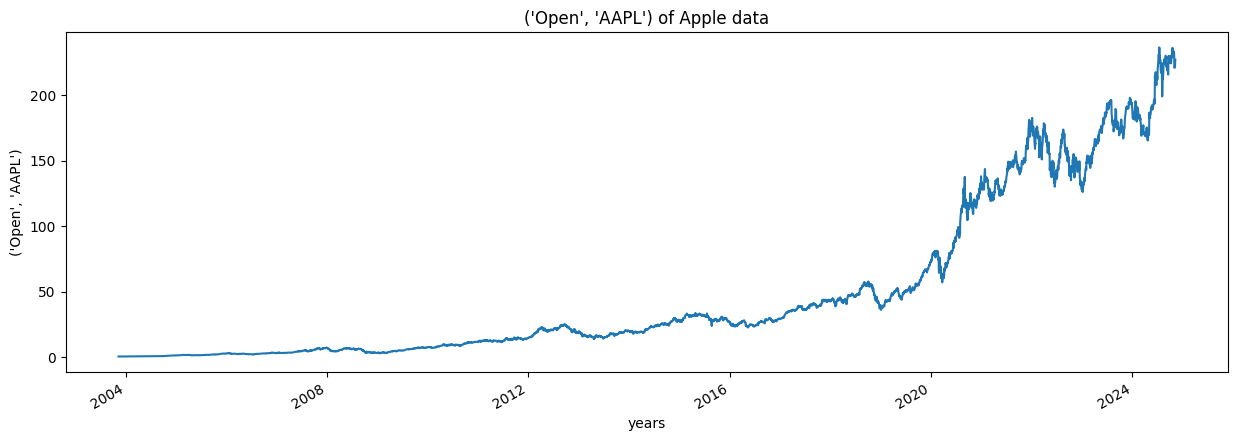

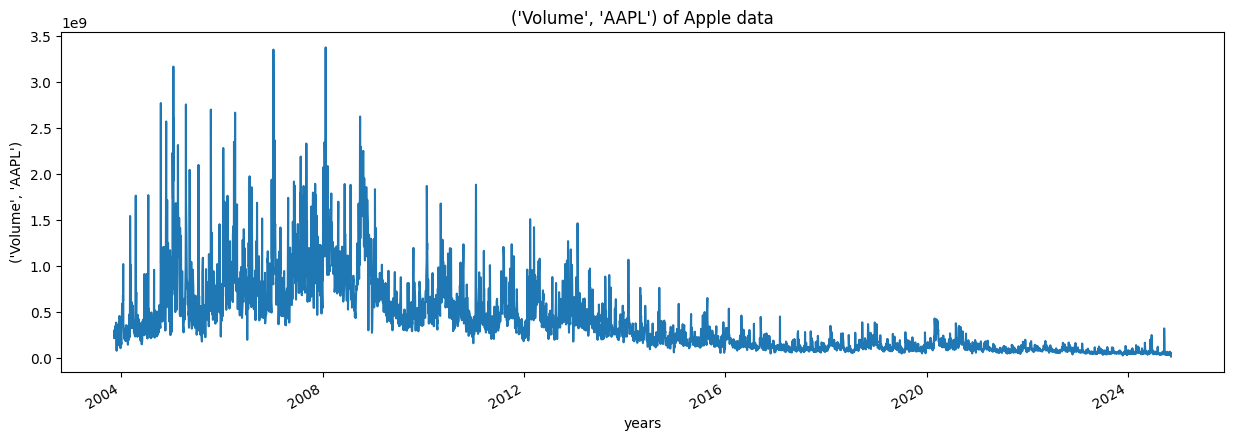

In [18]:
for column in apple_data.columns:
    plot_graph((15,5),apple_data[column], column)

In [19]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [20]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [22]:
for i in range(2004,2025):
    print(i,list(apple_data.index.year).count(i))

2004 252
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 217


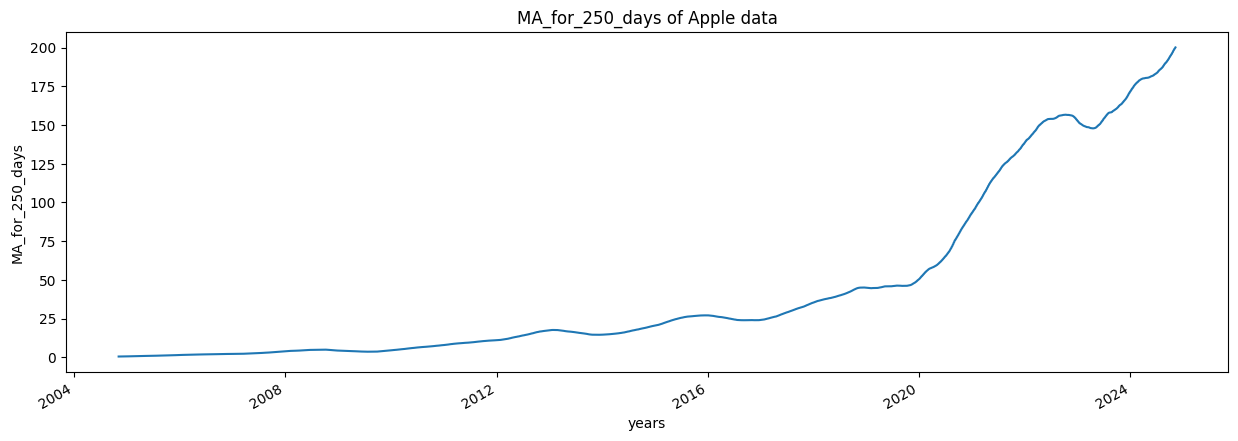

<Figure size 640x480 with 0 Axes>

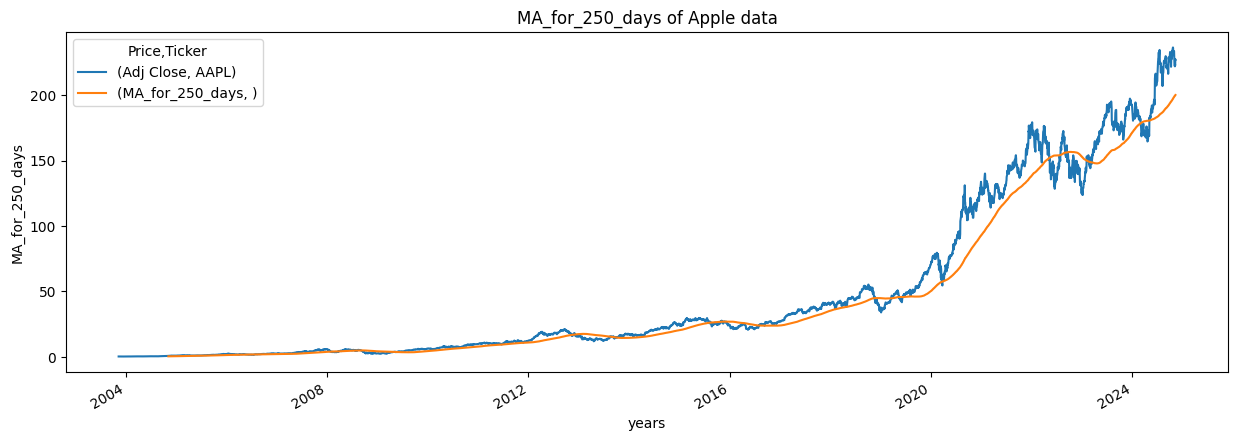

In [23]:
apple_data['MA_for_250_days'] = apple_data['Adj Close'].rolling(250).mean()
apple_data['MA_for_250_days'][0:250].tail()
plot_graph((15,5), apple_data['MA_for_250_days'], 'MA_for_250_days')
plot_graph((15,5), apple_data[['Adj Close','MA_for_250_days']],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

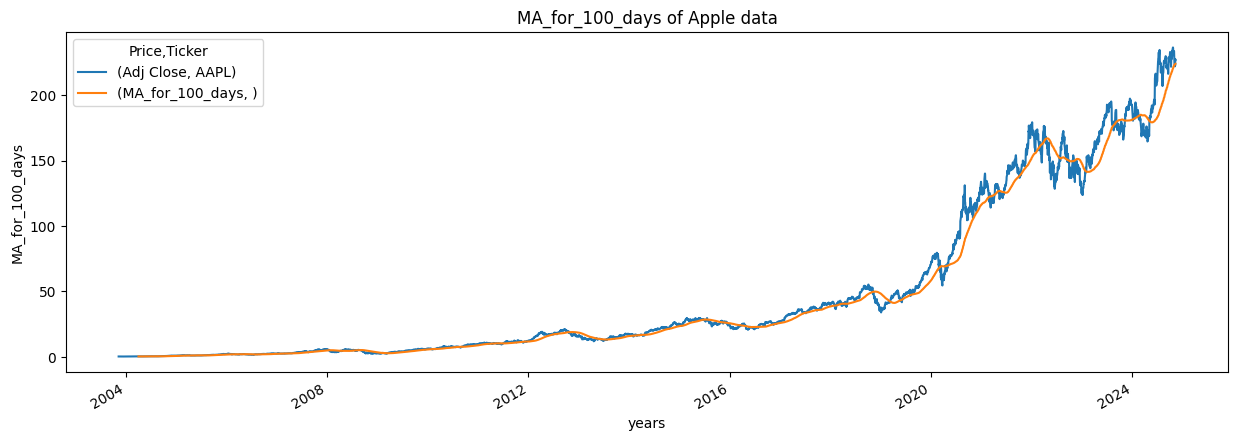

<Figure size 640x480 with 0 Axes>

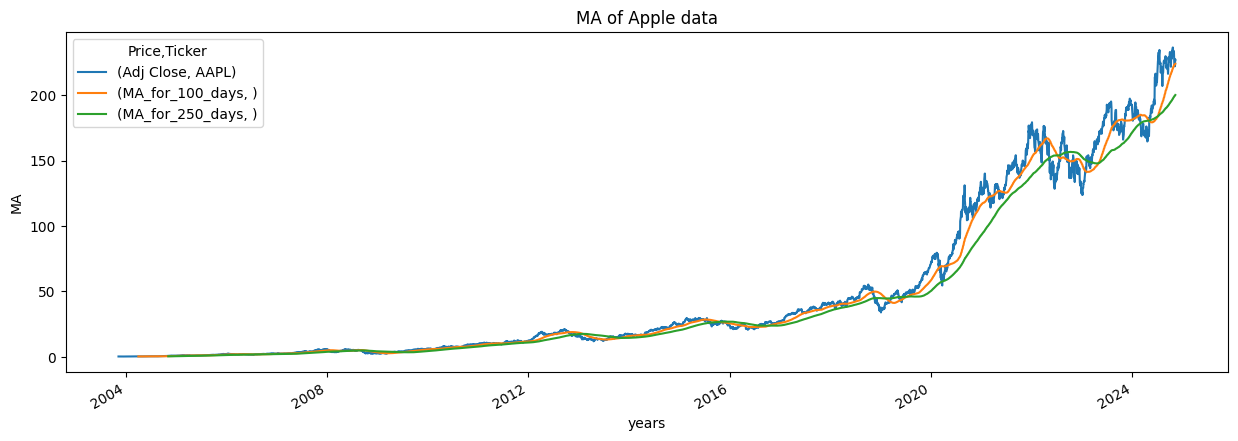

In [24]:
apple_data['MA_for_100_days'] = apple_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), apple_data[['Adj Close','MA_for_100_days']],'MA_for_100_days')
plot_graph((15,5), apple_data[['Adj Close','MA_for_100_days','MA_for_250_days']], 'MA')

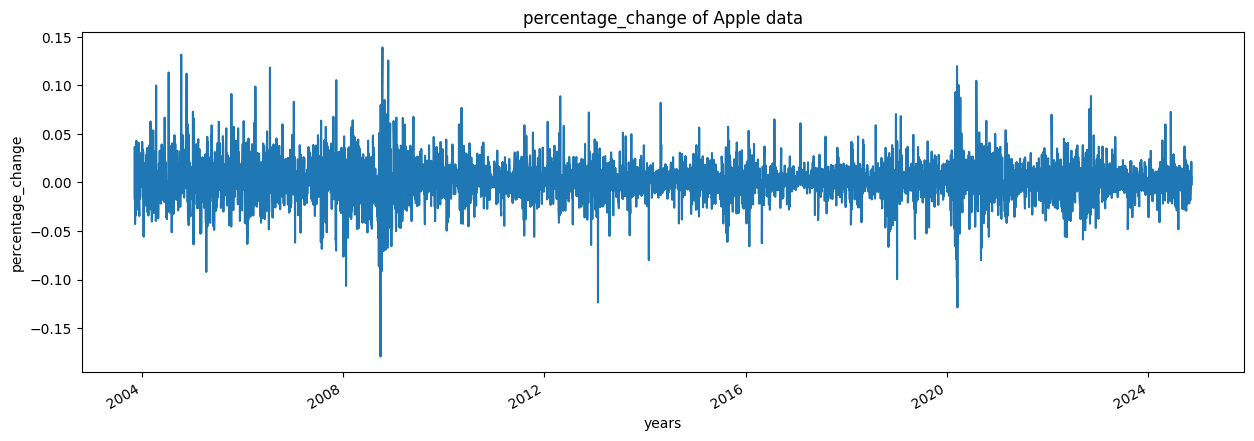

In [25]:
apple_data['percentage_change_cp'] = apple_data['Adj Close'].pct_change()
apple_data[['Adj Close','percentage_change_cp']].head()
plot_graph((15,5), apple_data['percentage_change_cp'], 'percentage_change')

In [26]:
Adj_close_price = apple_data[['Adj Close']]
max(Adj_close_price.values),min(Adj_close_price.values)


(array([236.47999573]), array([0.29707468]))

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data
len(scaled_data)

5286

In [28]:
x_data = []
y_data = []
for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

In [29]:
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)
x_data[0],y_data[0]
int(len(x_data)*0.7)
5286-100-int(len(x_data)*0.7)

1556

In [30]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]
x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3630, 100, 1)
(3630, 1)
(1556, 100, 1)
(1556, 1)


In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs = 2)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
3630/3630 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - loss: 1.4371e-04
Epoch 2/2
3630/3630 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - loss: 2.4260e-05


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [33]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))
rmse


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


6.459692872159405

In [34]:
ploting_data = pd.DataFrame({
    'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
}, index = apple_data.index[splitting_len+100:])
ploting_data.head()


,original_test_data,predictions
Date,,
2018-09-05 00:00:00+00:00,54.043705,55.473507
2018-09-06 00:00:00+00:00,53.145641,55.560627
2018-09-07 00:00:00+00:00,52.716858,55.145008
2018-09-10 00:00:00+00:00,52.009350,54.577099
2018-09-11 00:00:00+00:00,53.324310,53.906807


<Figure size 640x480 with 0 Axes>

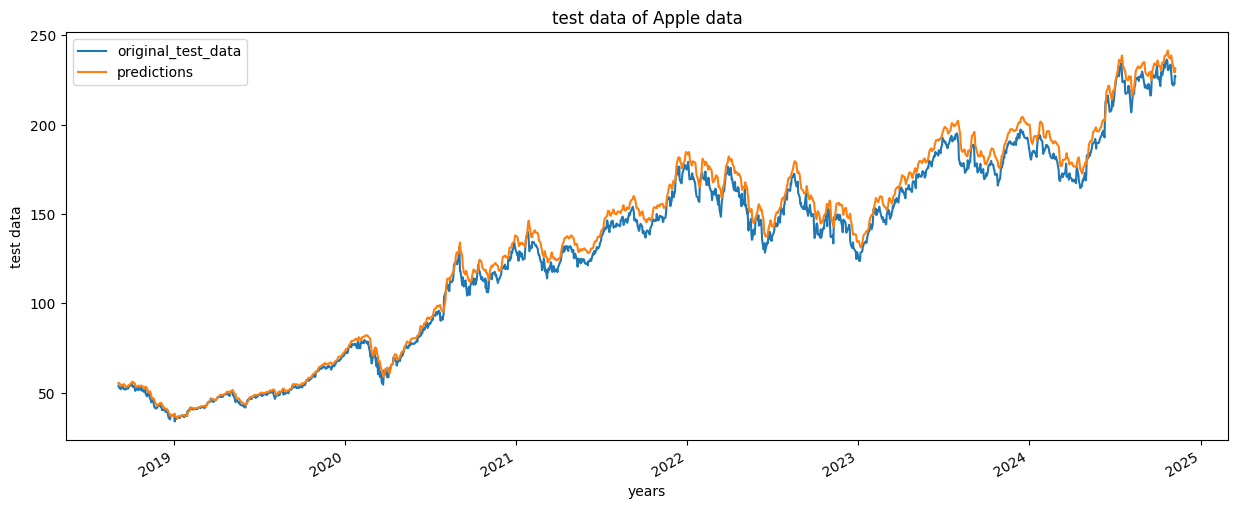

<Figure size 640x480 with 0 Axes>

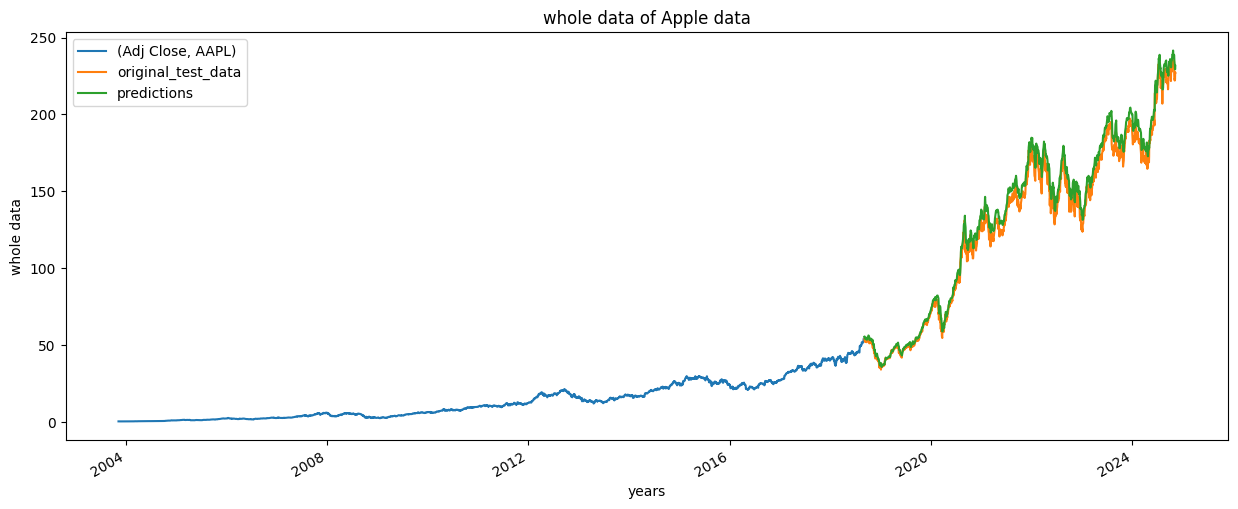

In [35]:
plot_graph((15,6), ploting_data, 'test data')
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [36]:
model.save("Latest_Apple_stock_market_model.keras")
